In [1]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.optimizers import Adam

In [2]:
import sys
sys.path.append('..')
from xDL.utils.data_utils import *
from xDL.models.NAM import NAM

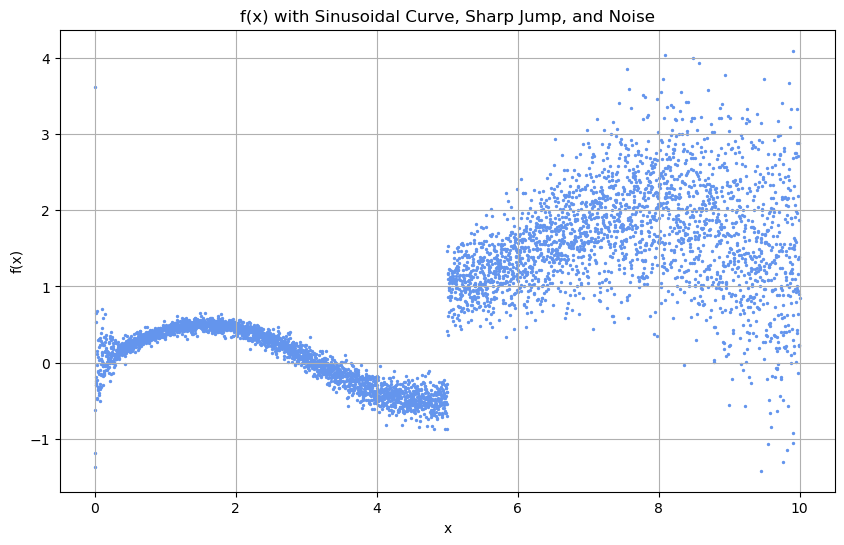

In [3]:
import numpy as np

def f_with_noise(x, jump_index):
    y = 50 * np.sin(x)  # Create a sinusoidal curve
    
    # Add noise with smaller variance before the jump
    if x < jump_index:
        noise = np.random.normal(0, 5*np.log(x+0.001)**2 + 1)
        noise += np.random.normal(0, 5)
    else:
        noise = np.random.normal(0, x**2)
    
    y += noise
    
    # Add a sharp jump at the specified point
    if x >= jump_index:
        y += 150
    
    return y

# Example usage with added noise
x_values = np.linspace(0, 10, 5000)  # Define the x-values
jump_index = 5  # Specify the jump point
pre_jump_noise_variance = 10  # Set the noise variance before the jump


# Generate y-values by applying the function to each x-value
y_values = [f_with_noise(x, jump_index)/100 for x in x_values]

# Plot the result
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, s=2, color="cornflowerblue",)
plt.title("f(x) with Sinusoidal Curve, Sharp Jump, and Noise")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()


In [4]:
data = pd.DataFrame({"Y": y_values, "X":x_values})
data = data.sample(frac=1.0, random_state=101).reset_index(drop=True)

In [11]:
model = NAM(
    "Y ~  -1 + MLP(X)",
    data=data, 
    feature_dropout=0.0001
    )

In [12]:

data = data.replace([np.inf, -np.inf], np.nan).dropna()
data.head()

,Y,X
0,-0.264887,3.436687
1,1.097445,5.023005
2,0.374287,0.690138
3,0.874533,5.043009
4,-0.174528,0.108022


In [13]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

# Train the model
model.fit(model.training_dataset, epochs=500, validation_data=model.validation_dataset)



Epoch 1/500


4/4 [==============================] - 1s 40ms/step - loss: 1.2663 - val_loss: 1.0771
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 0.9837 - val_loss: 0.8401
Epoch 3/500
4/4 [==============================] - 0s 16ms/step - loss: 0.7202 - val_loss: 0.5791
Epoch 4/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5122 - val_loss: 0.4608
Epoch 5/500
4/4 [==============================] - 0s 13ms/step - loss: 0.4917 - val_loss: 0.4890
Epoch 6/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5112 - val_loss: 0.4845
Epoch 7/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5090 - val_loss: 0.4368
Epoch 8/500
4/4 [==============================] - 0s 13ms/step - loss: 0.4508 - val_loss: 0.4309
Epoch 9/500
4/4 [==============================] - 0s 12ms/step - loss: 0.4444 - val_loss: 0.4465
Epoch 10/500
4/4 [==============================] - 0s 12ms/step - loss: 0.4581 - val_loss: 0.4603
Epoch 11/500
4/4 [=============

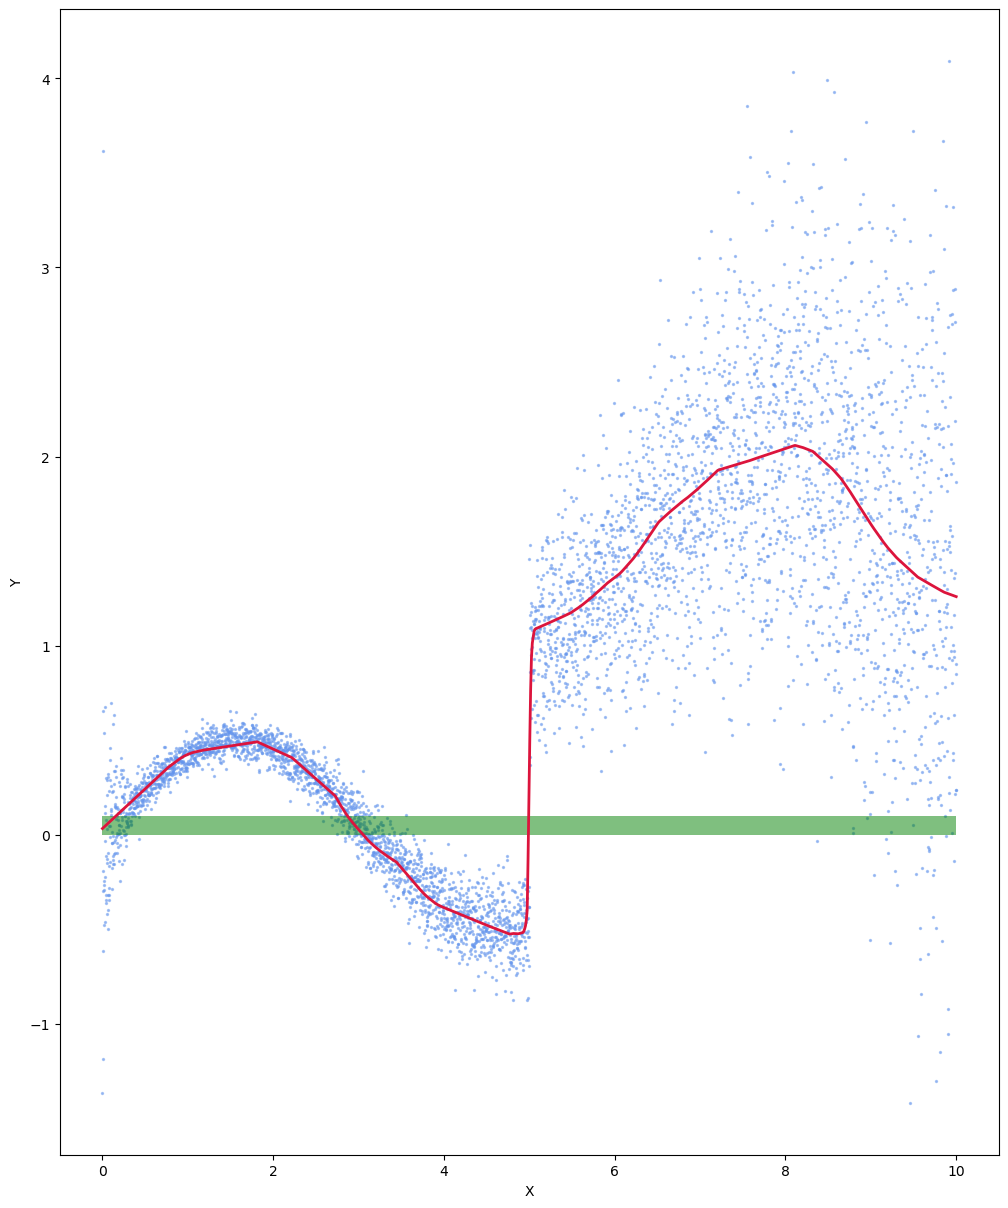

In [14]:
model.plot()